In [1]:
import fastai; fastai.__version__
from fastai.vision import *

In [2]:
import sys; sys.path.append("../dev")
from local.script import run_command

### experiment runs

In [3]:
PATH = Path("/home/turgutluk/data/siim_acr_pneu/")
IMAGES, MASKS, CODES, TRAIN, VALID, TEST = \
    "train/images_1024", "train/masks_1024", "codes.txt", "train.txt", 0.1, "test.txt"

In [4]:
bs = 1
size = 1024
epochs = 1
VALID = 0.1

In [ ]:
run_command(f"""
python {Path(fastai.__file__).parent}/launch.py 
--gpus=0123457 /home/turgutluk/git/fast-kaggle/dev/segmentation_training.py \
--PATH={PATH} \
--IMAGES={IMAGES} \
--MASKS={MASKS} \
--CODES={CODES} \
--TRAIN={TRAIN} \
--VALID={VALID} \
--TEST={TEST} \
--bs={bs} \
--size={size} \
--imagenet_pretrained=1 \
--max_lr=3e-3 \
--model_name=bestmodel \
--epochs={epochs} \
--tracking_metric=dice \
--void_name=Void \
--loss_function=xentropy \
--opt=radam
--EXPORT_PATH=./experiment_exports/experiment1
""")

To use this log_lamb_rs, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results
To use this log_lamb_rs, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results
To use this log_lamb_rs, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results
To use this log_lamb_rs, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results
To use this log_lamb_rs, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results
To use this log_lamb_rs, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results
To use this log_lamb_rs, please run 'pip install tensorboardx'. Also you must have Tensorboard running to see results
Print args here:


### res

In [20]:
from local.segmentation.metrics import *

In [5]:
export_path = Path("./experiment_exports/experiment1/"); export_path.ls()

[PosixPath('experiment_exports/experiment1/tmp'),
 PosixPath('experiment_exports/experiment1/Test_raw_preds.pkl'),
 PosixPath('experiment_exports/experiment1/Valid_raw_preds.pkl'),
 PosixPath('experiment_exports/experiment1/models'),
 PosixPath('experiment_exports/experiment1/mybestmodel_export.pkl')]

In [8]:
d = torch.load(Path(export_path/"Valid_raw_preds.pkl"))

In [9]:
d.keys()

dict_keys(['fnames', 'preds', 'targs'])

In [15]:
preds, targs = d['preds'], d['targs']

In [16]:
d['preds'].shape, d['targs'].shape

(torch.Size([101, 32, 112, 112]), torch.Size([101, 1, 112, 112]))

In [36]:
dice??

In [43]:
multilabel_dice(preds, targs, 30, mean=False)

tensor([1.0000, 0.0000, 0.0000, 1.0000, 0.7131, 0.3585, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.8270,
        1.0000, 0.1365, 0.0000, 0.9301, 0.0000, 1.0000, 0.0000, 1.0000, 0.6028,
        0.0000, 1.0000, 0.0000])

In [33]:
pred1 = ImageSegment(preds.argmax(1)[0][None,...])
targ1 = ImageSegment(targs[0])

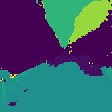

In [34]:
pred1

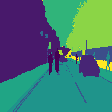

In [35]:
targ1